# INTRODUCTION

Sentiment Analyzers are a part of Natural Language Processing (NLP). NLP, simply put, is a machine learning technology that allows computers to understand human language. Chances are, you're already familiar with this technology or have even used it yourself! Smart assistants like Siri and Alexa, chatbots like ChatGPT and Gemini, and tools like Grammarly all leverage NLP.

Sentiment Analysis, also referred to as opinion mining, is a specific application within NLP focused on analyzing the emotional tone of text. It aims to classify text as positive, negative, or neutral. For instance, classifying YouTube comments under a video helps creators understand what type of content resonates with their viewers. Similarly, analyzing product reviews helps companies gauge how well their products are performing in the market. As you can see, sentiment analysis holds significant importance.
Now that you have a basic understanding of this field, let's waste no more time and dive into the project itself!


In [1]:
# Importing all necessary libraries

#FOR ANALYSIS/CLEANING/COMPUTATION:
import pandas as pd
import numpy as np

#FOR VISUALIZATION:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
file_path = '/kaggle/input/spotify-dataset/DATASET.csv'
df = pd.read_csv(file_path) #creating a data frame which you can assume to be a excel sheet inside a code. 
df.head(10) # view the first 10 rows of the dataframe

,Review,label
0,"Great music service, the audio is high quality...",POSITIVE
1,Please ignore previous negative rating. This a...,POSITIVE
2,"This pop-up ""Get the best Spotify experience o...",NEGATIVE
3,Really buggy and terrible to use as of recently,NEGATIVE
4,Dear Spotify why do I get songs that I didn't ...,NEGATIVE
5,The player controls sometimes disappear for no...,NEGATIVE
6,I love the selection and the lyrics are provid...,POSITIVE
7,Still extremely slow when changing storage to ...,NEGATIVE
8,It's a great app and the best mp3 music app I ...,POSITIVE
9,"I'm deleting this app, for the following reaso...",NEGATIVE



# BASIC EDA

EDA (Exploratory Data Analysis) is an approach used in data science and statistics to analyze and summarize the main characteristics of a dataset, i.e. to gain a well-rounded overview of a dataset.

In [3]:
df.info() #provides a summary of the data frame

#understanding the output of this code:
#Total entries we have : 52,702
#2 columns- "Review" and "label"
#Review column has 52,686 non-null entries i.e. 16 null entries(52,702-52,686=16)
#hence we have 16 missing values that need to be handled.
#label column has all non-null entries hence no missing values.
#Dtype is object which means data is of text/mixed type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52702 entries, 0 to 52701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  52686 non-null  object
 1   label   52702 non-null  object
dtypes: object(2)
memory usage: 823.6+ KB


In [4]:
# Explicitly check for missing values
df.isnull().sum()

Review    16
label      0
dtype: int64

In [5]:
#as the missing values compromise of a small section of our dataset
#The best approach is to just drop them.
df = df.dropna(subset=['Review']) 

In [6]:
df.info() # the dataset is now free of missing values!

<class 'pandas.core.frame.DataFrame'>
Index: 52686 entries, 0 to 52701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  52686 non-null  object
 1   label   52686 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [7]:
df['label'].value_counts()# Check sentiment/label distribution

label
NEGATIVE    29423
POSITIVE    23263
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

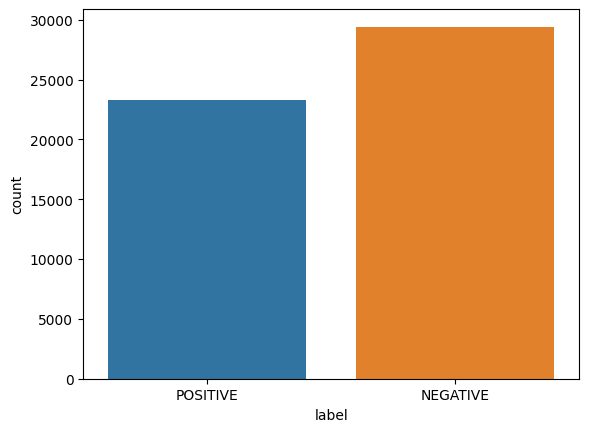

In [8]:
sns.countplot(x='label', data=df)  # Visualize the sentiment/label distribution

# TEXT PREPROCESSING 

Text preprocessing is a crucial step in natural language processing (NLP) and machine learning tasks. It involves transforming raw text into a clean, structured format that can be more easily and effectively be analyzed by models. 

Data (Text) preprocessing will have the following steps:

**1. Cleaning**

**2. Tokenization**

**3. Stop words removal**

**4. Stemming or Lemmatization**



# 1. CLEANING THE DATASET
The "Reviews" column of our dataset has a variety of symbols, punctuation, special character etc in it that is not of our requirement. 
Example: , : ( ) ? . " ; ! - + = ~ %  etc are not of use.

**Example**
Entry 4:
Dear Spotify why do I get songs that I didn't put on my playlist??? And why do we have shuffle play?

Entry 283:
I really like a sound.....hello everyone...have a nice day....Ã°Å¸ËœÅ½Ã°Å¸ËœÅ½Ã°Å¸ËœÅ½ Stay safe...always god bless...Ã°Å¸â„¢ÂÃ°Å¸â„¢ÂÃ°Å¸â„¢Â

Entry 556:
One of the best app to listen to music And personally I have listings to ads inbetween :)

In [9]:
# For cleaning, we will need pandas for data manipulation and 
#(regex) for regular expressions (they are based on context free grammars)
import re #regex


In [10]:
def clean_text(text):
    text = re.sub(r'Ã[\x80-\xBF]+', ' ', text) 
    text = re.sub(r'[^a-zA-Z\s]', ' ', text) 
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text.lower()  # Convert all to lowercase

**Understanding the clean_text function**


**text = re.sub(r'Ã[\x80-\xBF]+', ' ', text):**
Removes encoded symbols that appear as characters like Ã, Å, Ë.

**text = re.sub(r'[^a-zA-Z\s]', ' ', text):**

The symbol "^" at the start of the square brackets means "not". Hence we are replacing all symbols that are not lower and upper case alphabels(a-z,A-Z) or white space(/s) with an empty string with a space.

**text = re.sub(r'\s+', ' ', text):**

At last i replaced all multiple spaces with a single space to ensure readability. The strip function removes any leading or trailing whitespaces and we convert all reviews to lower case.


In [11]:
df['Review'] = df['Review'].apply(clean_text) #applying the clean_text function to Review column

In [12]:
#VIEW THE CLEANED TEXTS IN "Review" column again
pd.set_option('display.max_colwidth', None) #to view text fully and so that
#pandas doesn't truncate the text

print(df.iloc[283]['Review']) #view entry 283 

i really like a sound hello everyone have a nice day stay safe always god bless


In [13]:
print(df.iloc[396]['Review'])
#Entry 428:
#Before cleaning:Best music streaming app ever! Ã°Å¸â€˜Å’Ã°Å¸â€˜Â
#After cleaning:Best music streaming app ever

i like this app very much but my only problem is that i think it s very stupid that you have to skip to your favorite song and also that your song that you search is shuffled with other songs


# 2. TOKENIZATION

Tokenization is the process of breaking down a string of text into smaller units, or tokens, which essentially are meaningful words.

We require an individual meaniningful entity to work upon which can only be words and not sentences.

Example:
good, great, wow etc signal a positive review.

bad, lame, boring etc signal a negative review.

In [14]:
#METHOD 1 : Tokenize using nltk library (faster method)
#pip install nltk #you may not need to download it

In [15]:
import nltk
from nltk.tokenize import word_tokenize
#nltk.download('punkt') : kaggle has this pre-downloaded so no need to download.

def tokenize_text(text):
    tokens = word_tokenize(text)  
    return tokens  

df['Tokens'] = df['Review'].apply(tokenize_text)

print(df.iloc[283]['Tokens']) 

['i', 'really', 'like', 'a', 'sound', 'hello', 'everyone', 'have', 'a', 'nice', 'day', 'stay', 'safe', 'always', 'god', 'bless']


In [16]:
#METHOD 2: Tokenize using split function (works fine, less efficient)
#def tokenize(text):
    #return text.split() #splits texts based on white spaces
#df['Tokens'] = df['Review'].apply(tokenize)
#print(df.iloc[283]['Tokens'])

In [17]:
df.head(10) #view your dataset to gain a better understanding

,Review,label,Tokens
0,great music service the audio is high quality and the app is easy to use also very quick and friendly support,POSITIVE,"[great, music, service, the, audio, is, high, quality, and, the, app, is, easy, to, use, also, very, quick, and, friendly, support]"
1,please ignore previous negative rating this app is super great i give it five stars,POSITIVE,"[please, ignore, previous, negative, rating, this, app, is, super, great, i, give, it, five, stars]"
2,this pop up get the best spotify experience on android is too annoying please let s get rid of this,NEGATIVE,"[this, pop, up, get, the, best, spotify, experience, on, android, is, too, annoying, please, let, s, get, rid, of, this]"
3,really buggy and terrible to use as of recently,NEGATIVE,"[really, buggy, and, terrible, to, use, as, of, recently]"
4,dear spotify why do i get songs that i didn t put on my playlist and why do we have shuffle play,NEGATIVE,"[dear, spotify, why, do, i, get, songs, that, i, didn, t, put, on, my, playlist, and, why, do, we, have, shuffle, play]"
5,the player controls sometimes disappear for no reason app restart forgets what i was playing but fixes the issue,NEGATIVE,"[the, player, controls, sometimes, disappear, for, no, reason, app, restart, forgets, what, i, was, playing, but, fixes, the, issue]"
6,i love the selection and the lyrics are provided with the song you re listening to,POSITIVE,"[i, love, the, selection, and, the, lyrics, are, provided, with, the, song, you, re, listening, to]"
7,still extremely slow when changing storage to external sd card i m convinced this is done on purpose spotify knows of this issue and has done nothing to solve it over time i have changed sd cards each being faster in read write speeds all samsung brand and please add don t like song so it will never appear again in my searches or playlists,NEGATIVE,"[still, extremely, slow, when, changing, storage, to, external, sd, card, i, m, convinced, this, is, done, on, purpose, spotify, knows, of, this, issue, and, has, done, nothing, to, solve, it, over, time, i, have, changed, sd, cards, each, being, faster, in, read, write, speeds, all, samsung, brand, and, please, add, don, t, like, song, so, it, will, never, appear, again, in, my, searches, or, playlists]"
8,it s a great app and the best mp music app i have ever used but there is one problem that why can t we play some songs or find some songs despite this the app is wonderful i recommend it it s just the best,POSITIVE,"[it, s, a, great, app, and, the, best, mp, music, app, i, have, ever, used, but, there, is, one, problem, that, why, can, t, we, play, some, songs, or, find, some, songs, despite, this, the, app, is, wonderful, i, recommend, it, it, s, just, the, best]"
9,i m deleting this app for the following reasons this app now has a failing business model whether streaming services like it or not the consumer doesn t want to pay for music they can t fully own and ads successively upon logging in before a single song is too much closed the app during ad number and i m more patient than most if those are the only ways you can profit you ve already peaked all that s left is your decline,NEGATIVE,"[i, m, deleting, this, app, for, the, following, reasons, this, app, now, has, a, failing, business, model, whether, streaming, services, like, it, or, not, the, consumer, doesn, t, want, to, pay, for, music, they, can, t, fully, own, and, ads, successively, upon, logging, in, before, a, single, song, is, too, much, closed, the, app, during, ad, number, and, i, m, more, patient, than, most, if, those, are, the, only, ways, you, can, profit, you, ve, already, peaked, all, that, s, left, is, your, decline]"


# 3. REMOVING STOPWORDS

Stop words are words that have less meaningful value/contribution to our analysis. Words like i, he, she, they, went, want, for, in etc hold little to no value and hence are better off removed.

You can also create a list of custom stop words specific to your domain. For example words like music, app, playlist etc are common stop words for this dataset.



In [18]:
#nltk.download('stopwords'): : kaggle has this pre-downloaded so no need to download.
from nltk.corpus import stopwords
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))  # Get the set of English stopwords
    if custom_stopwords:
        stop_words.update(custom_stopwords)
    return [word for word in tokens if word.lower() not in stop_words]  # Filter out stopwords

In [19]:
#my list of custom_stop_words
custom_stopwords = {'app', 'music','play', 'spotify', 'song', 'songs', 'listen', 'playing','get', 'playlist'}
df['Filtered_Tokens'] = df['Tokens'].apply(remove_stopwords)
# Remove stopwords from the Tokens column

In [20]:
df.head(10) #don't forget to see the magic !

,Review,label,Tokens,Filtered_Tokens
0,great music service the audio is high quality and the app is easy to use also very quick and friendly support,POSITIVE,"[great, music, service, the, audio, is, high, quality, and, the, app, is, easy, to, use, also, very, quick, and, friendly, support]","[great, service, audio, high, quality, easy, use, also, quick, friendly, support]"
1,please ignore previous negative rating this app is super great i give it five stars,POSITIVE,"[please, ignore, previous, negative, rating, this, app, is, super, great, i, give, it, five, stars]","[please, ignore, previous, negative, rating, super, great, give, five, stars]"
2,this pop up get the best spotify experience on android is too annoying please let s get rid of this,NEGATIVE,"[this, pop, up, get, the, best, spotify, experience, on, android, is, too, annoying, please, let, s, get, rid, of, this]","[pop, best, experience, android, annoying, please, let, rid]"
3,really buggy and terrible to use as of recently,NEGATIVE,"[really, buggy, and, terrible, to, use, as, of, recently]","[really, buggy, terrible, use, recently]"
4,dear spotify why do i get songs that i didn t put on my playlist and why do we have shuffle play,NEGATIVE,"[dear, spotify, why, do, i, get, songs, that, i, didn, t, put, on, my, playlist, and, why, do, we, have, shuffle, play]","[dear, put, shuffle]"
5,the player controls sometimes disappear for no reason app restart forgets what i was playing but fixes the issue,NEGATIVE,"[the, player, controls, sometimes, disappear, for, no, reason, app, restart, forgets, what, i, was, playing, but, fixes, the, issue]","[player, controls, sometimes, disappear, reason, restart, forgets, fixes, issue]"
6,i love the selection and the lyrics are provided with the song you re listening to,POSITIVE,"[i, love, the, selection, and, the, lyrics, are, provided, with, the, song, you, re, listening, to]","[love, selection, lyrics, provided, listening]"
7,still extremely slow when changing storage to external sd card i m convinced this is done on purpose spotify knows of this issue and has done nothing to solve it over time i have changed sd cards each being faster in read write speeds all samsung brand and please add don t like song so it will never appear again in my searches or playlists,NEGATIVE,"[still, extremely, slow, when, changing, storage, to, external, sd, card, i, m, convinced, this, is, done, on, purpose, spotify, knows, of, this, issue, and, has, done, nothing, to, solve, it, over, time, i, have, changed, sd, cards, each, being, faster, in, read, write, speeds, all, samsung, brand, and, please, add, don, t, like, song, so, it, will, never, appear, again, in, my, searches, or, playlists]","[still, extremely, slow, changing, storage, external, sd, card, convinced, done, purpose, knows, issue, done, nothing, solve, time, changed, sd, cards, faster, read, write, speeds, samsung, brand, please, add, like, never, appear, searches, playlists]"
8,it s a great app and the best mp music app i have ever used but there is one problem that why can t we play some songs or find some songs despite this the app is wonderful i recommend it it s just the best,POSITIVE,"[it, s, a, great, app, and, the, best, mp, music, app, i, have, ever, used, but, there, is, one, problem, that, why, can, t, we, play, some, songs, or, find, some, songs, despite, this, the, app, is, wonderful, i, recommend, it, it, s, just, the, best]","[great, best, mp, ever, used, one, problem, find, despite, wonderful, recommend, best]"
9,i m deleting this app for the following reasons this app now has a failing business model whether streaming services like it or not the consumer doesn t want to pay for music they can t fully own and ads successively upon logging in before a single song is too much closed the app during ad number and i m more patient than most if those are the only ways you can profit you ve already peaked all that s left is your decline,NEGATIVE,"[i, m, deleting, this, app, for, 

In [21]:
#I used this to identify/modify my list of custom stop words. 
from collections import Counter 
all_filtered_tokens = [word for tokens in df['Filtered_Tokens'] for word in tokens]

# Count the occurrences of each word after removing stopwords
word_counts_after_removal = Counter(all_filtered_tokens)

# Get the 20 most common words after removing stopwords
most_common_words_after_removal = word_counts_after_removal.most_common(20)
print(most_common_words_after_removal)


#choosing custom stop words is tricky as it's debatable whether they contribute 
#to the accuracy or not. I've selected just a few from top 20.

[('like', 7991), ('good', 7803), ('love', 7758), ('premium', 7003), ('ads', 6743), ('great', 6206), ('even', 5382), ('want', 4948), ('use', 4802), ('update', 4453), ('best', 4291), ('really', 4006), ('one', 3845), ('please', 3797), ('time', 3773), ('fix', 3761), ('every', 3650), ('listening', 3185), ('phone', 3123), ('would', 3063)]


# 4. STEMMING

Stemming reduces words to their root form (or stem).
Note: may not always be a valid word in the language. 

For example:
"playing" might be stemmed to "play" 

"studying" might be stemmed to "study" 

"running" might be stemmed to "run" 

"ring" might be stemmed to "r"  (ineffiency)

# 5.  LEMMATIZATION

Lemmatization reduces words to their base or dictionary form (lemma) by considering their dictionary meaning hence providing more accuracy than stemming. 

For example:

"running" becomes "run," 

"better" becomes "good."

"ring" remains "ring."

**Hence I won't be performing Stemming, I'll be going forward with Lemmatization.**

In [22]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/
#to use wordnet; execute this (to avoid error). 
#REFER TO DISCUSSION: https://www.kaggle.com/discussions/general/395169

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [23]:
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to perform lemmatization
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word, pos='v') for word in tokens]
#pos is set to v (verb) for better accuracy. Refer below manual to understand more.
# refer: https://www.nltk.org/book/ch05.html
df['Lemmatized_Tokens'] = df['Filtered_Tokens'].apply(lemmatize_tokens)

In [24]:
df.head(10)

,Review,label,Tokens,Filtered_Tokens,Lemmatized_Tokens
0,great music service the audio is high quality and the app is easy to use also very quick and friendly support,POSITIVE,"[great, music, service, the, audio, is, high, quality, and, the, app, is, easy, to, use, also, very, quick, and, friendly, support]","[great, service, audio, high, quality, easy, use, also, quick, friendly, support]","[great, service, audio, high, quality, easy, use, also, quick, friendly, support]"
1,please ignore previous negative rating this app is super great i give it five stars,POSITIVE,"[please, ignore, previous, negative, rating, this, app, is, super, great, i, give, it, five, stars]","[please, ignore, previous, negative, rating, super, great, give, five, stars]","[please, ignore, previous, negative, rat, super, great, give, five, star]"
2,this pop up get the best spotify experience on android is too annoying please let s get rid of this,NEGATIVE,"[this, pop, up, get, the, best, spotify, experience, on, android, is, too, annoying, please, let, s, get, rid, of, this]","[pop, best, experience, android, annoying, please, let, rid]","[pop, best, experience, android, annoy, please, let, rid]"
3,really buggy and terrible to use as of recently,NEGATIVE,"[really, buggy, and, terrible, to, use, as, of, recently]","[really, buggy, terrible, use, recently]","[really, buggy, terrible, use, recently]"
4,dear spotify why do i get songs that i didn t put on my playlist and why do we have shuffle play,NEGATIVE,"[dear, spotify, why, do, i, get, songs, that, i, didn, t, put, on, my, playlist, and, why, do, we, have, shuffle, play]","[dear, put, shuffle]","[dear, put, shuffle]"
5,the player controls sometimes disappear for no reason app restart forgets what i was playing but fixes the issue,NEGATIVE,"[the, player, controls, sometimes, disappear, for, no, reason, app, restart, forgets, what, i, was, playing, but, fixes, the, issue]","[player, controls, sometimes, disappear, reason, restart, forgets, fixes, issue]","[player, control, sometimes, disappear, reason, restart, forget, fix, issue]"
6,i love the selection and the lyrics are provided with the song you re listening to,POSITIVE,"[i, love, the, selection, and, the, lyrics, are, provided, with, the, song, you, re, listening, to]","[love, selection, lyrics, provided, listening]","[love, selection, lyric, provide, listen]"
7,still extremely slow when changing storage to external sd card i m convinced this is done on purpose spotify knows of this issue and has done nothing to solve it over time i have changed sd cards each being faster in read write speeds all samsung brand and please add don t like song so it will never appear again in my searches or playlists,NEGATIVE,"[still, extremely, slow, when, changing, storage, to, external, sd, card, i, m, convinced, this, is, done, on, purpose, spotify, knows, of, this, issue, and, has, done, nothing, to, solve, it, over, time, i, have, changed, sd, cards, each, being, faster, in, read, write, speeds, all, samsung, brand, and, please, add, don, t, like, song, so, it, will, never, appear, again, in, my, searches, or, playlists]","[still, extremely, slow, changing, storage, external, sd, card, convinced, done, purpose, knows, issue, done, nothing, solve, time, changed, sd, cards, faster, read, write, speeds, samsung, brand, please, add, like, never, appear, searches, playlists]","[still, extremely, slow, change, storage, external, sd, card, convince, do, purpose, know, issue, do, nothing, solve, time, change, sd, card, faster, read, write, speed, samsung, brand, please, add, like, never, appear, search, playlists]"
8,it s a great app and the best mp music app i have ever used but there is one problem that why can t we play some songs or find some songs despite this the app is wonderful i recommend it it s just the best,POSITIVE,"[it, s, a, great, app, and, the, best, mp, music, app, i, have, ever, used, but, there, is, one, problem, that, why, can, t, we, play, some, song

# FEATURE EXTRACTION using TF-IDF

TF-IDF is a natural language processing (NLP) technique that's used to evaluate the importance of different words in a sentence.


It's simple, intuitive technique which utilizes a fixed size input.
It captures the importance of words (hence the semantics) while reducing the influence of stopwords alongside.

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

#performing TF-IDF vectorization
def apply_tfidf(df):
    df['TFIDF_Tokens'] = df['Lemmatized_Tokens'].apply(lambda x: ' '.join(x))
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['TFIDF_Tokens'])
    feature_names = tfidf_vectorizer.get_feature_names_out()
    return tfidf_matrix, feature_names

# Applying TF-IDF on our Dataframe
tfidf_matrix, feature_names = apply_tfidf(df)
df.head(10)

,Review,label,Tokens,Filtered_Tokens,Lemmatized_Tokens,TFIDF_Tokens
0,great music service the audio is high quality and the app is easy to use also very quick and friendly support,POSITIVE,"[great, music, service, the, audio, is, high, quality, and, the, app, is, easy, to, use, also, very, quick, and, friendly, support]","[great, service, audio, high, quality, easy, use, also, quick, friendly, support]","[great, service, audio, high, quality, easy, use, also, quick, friendly, support]",great service audio high quality easy use also quick friendly support
1,please ignore previous negative rating this app is super great i give it five stars,POSITIVE,"[please, ignore, previous, negative, rating, this, app, is, super, great, i, give, it, five, stars]","[please, ignore, previous, negative, rating, super, great, give, five, stars]","[please, ignore, previous, negative, rat, super, great, give, five, star]",please ignore previous negative rat super great give five star
2,this pop up get the best spotify experience on android is too annoying please let s get rid of this,NEGATIVE,"[this, pop, up, get, the, best, spotify, experience, on, android, is, too, annoying, please, let, s, get, rid, of, this]","[pop, best, experience, android, annoying, please, let, rid]","[pop, best, experience, android, annoy, please, let, rid]",pop best experience android annoy please let rid
3,really buggy and terrible to use as of recently,NEGATIVE,"[really, buggy, and, terrible, to, use, as, of, recently]","[really, buggy, terrible, use, recently]","[really, buggy, terrible, use, recently]",really buggy terrible use recently
4,dear spotify why do i get songs that i didn t put on my playlist and why do we have shuffle play,NEGATIVE,"[dear, spotify, why, do, i, get, songs, that, i, didn, t, put, on, my, playlist, and, why, do, we, have, shuffle, play]","[dear, put, shuffle]","[dear, put, shuffle]",dear put shuffle
5,the player controls sometimes disappear for no reason app restart forgets what i was playing but fixes the issue,NEGATIVE,"[the, player, controls, sometimes, disappear, for, no, reason, app, restart, forgets, what, i, was, playing, but, fixes, the, issue]","[player, controls, sometimes, disappear, reason, restart, forgets, fixes, issue]","[player, control, sometimes, disappear, reason, restart, forget, fix, issue]",player control sometimes disappear reason restart forget fix issue
6,i love the selection and the lyrics are provided with the song you re listening to,POSITIVE,"[i, love, the, selection, and, the, lyrics, are, provided, with, the, song, you, re, listening, to]","[love, selection, lyrics, provided, listening]","[love, selection, lyric, provide, listen]",love selection lyric provide listen
7,still extremely slow when changing storage to external sd card i m convinced this is done on purpose spotify knows of this issue and has done nothing to solve it over time i have changed sd cards each being faster in read write speeds all samsung brand and please add don t like song so it will never appear again in my searches or playlists,NEGATIVE,"[still, extremely, slow, when, changing, storage, to, external, sd, card, i, m, convinced, this, is, done, on, purpose, spotify, knows, of, this, issue, and, has, done, nothing, to, solve, it, over, time, i, have, changed, sd, cards, each, being, faster, in, read, write, speeds, all, samsung, brand, and, please, add, don, t, like, song, so, it, will, never, appear, again, in, my, searches, or, playlists]","[still, extremely, slow, changing, storage, external, sd, card, convinced, done, purpose, knows, issue, done, nothing, solve, time, changed, sd, cards, faster, read, write, speeds, samsung, brand, please, add, like, never, appear, searches, playlists]","[still, extremely, slow, change, storage, external, sd, card, convince, do, purpose, know, issue, do, nothing, solve, time, change, sd, card, faster, read, write, speed, samsung, brand, please, add, like, never, appear, search, playlists]",still extreme

# SPILLITING DATASET

In [26]:
from sklearn.model_selection import train_test_split
X = tfidf_matrix  # Features from TF-IDF
y = df['label']   # Target labels

# Splitting the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MODEL TRAINING AND TESTING

In [27]:
#SOME COMMON LIBRARIES
from sklearn.metrics import accuracy_score

In [28]:
#USING LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.8783


In [29]:
#USING SUPPORT VECTOR CLASSIFIER
from sklearn.svm import SVC

model=SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Support Vector Classifier Accuracy: {accuracy:.4f}")

Support Vector Classifier Accuracy: 0.8812


In [30]:
#USING RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Classifier Accuracy: {accuracy:.4f}")

Random Forest Classifier Accuracy: 0.8621


In [31]:
# USING MULTINOMIAL NAIVE BAYES MODEL
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB(alpha=0.5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Multinomial Naive Bayes Accuracy: {accuracy:.4f}")

Multinomial Naive Bayes Accuracy: 0.8569


# RESULT & CONCLUSION

After thorough training and testing of multiple models; I have achieved the following result (or accuracies):

1. Logistic Regression: 87.83%
2. Random Forest Classifier: 86.28%
3. Multinomial Naive Bayes: 85.69%
4. Support Vector Classifier: 88.12% 


Clearly the Support Vector Classifier ML model provides the most accuracy.
